In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

In [91]:
##Source - https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh
train=pd.read_excel('Data_Train.xlsx')
sample = pd.read_excel('Sample_submission.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [159]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [93]:
test = pd.concat([test,sample],axis=1)

In [94]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [95]:
train.shape,test.shape,train.shape[0]/(train.shape[0]+test.shape[0])*100

((10683, 11), (2671, 11), 79.99850232140183)

In [96]:
df= pd.concat([train,test])
df.shape

(13354, 11)

In [97]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Feature Engineering

In [98]:
##Droping columns that does not seem practical to ask to a customer.
df.drop(labels=['Route','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [99]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302


In [100]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [101]:
df['Source'].value_counts(),df['Destination'].value_counts()

(Delhi       5682
 Kolkata     3581
 Banglore    2752
 Mumbai       883
 Chennai      456
 Name: Source, dtype: int64,
 Cochin       5682
 Banglore     3581
 Delhi        1582
 New Delhi    1170
 Hyderabad     883
 Kolkata       456
 Name: Destination, dtype: int64)

In [102]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Total_Stops        1
Price              0
dtype: int64

In [103]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(13354, 7)
(13353, 7)


In [104]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302


In [105]:
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [106]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019


In [107]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')

In [108]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Dep_Time         13353 non-null  object
 5   Total_Stops      13353 non-null  object
 6   Price            13353 non-null  int64 
 7   Day              13353 non-null  object
 8   Month            13353 non-null  object
 9   Year             13353 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [110]:
df['Stops'] = df['Total_Stops'].str.split().str[0]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1


In [111]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,0 stop,3897,24,03,2019,0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,2 stops,7662,1,05,2019,2,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,2 stops,13882,9,06,2019,2,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,1 stop,6218,12,05,2019,1,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,1 stop,13302,01,03,2019,1,16,50


In [113]:
#Converting the datatype o newly created features 
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13353 non-null  object
 1   Date_of_Journey   13353 non-null  object
 2   Source            13353 non-null  object
 3   Destination       13353 non-null  object
 4   Dep_Time          13353 non-null  object
 5   Total_Stops       13353 non-null  object
 6   Price             13353 non-null  int64 
 7   Day               13353 non-null  int32 
 8   Month             13353 non-null  int32 
 9   Year              13353 non-null  int32 
 10  Stops             13353 non-null  int32 
 11  Departure_Hour    13353 non-null  int32 
 12  Departure_Minute  13353 non-null  int32 
dtypes: int32(6), int64(1), object(6)
memory usage: 1.1+ MB


In [115]:
#Now droping the parent features since we don't need them 
df.drop(['Date_of_Journey','Dep_Time','Total_Stops'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50


In [116]:
df.Airline.value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [117]:
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
source_dict

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [118]:
df.Destination.value_counts().index.sort_values()

Index(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object')

In [119]:
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

print(airline_dict)

{'IndiGo': 3, 'Air India': 1, 'Jet Airways': 4, 'SpiceJet': 8, 'Multiple carriers': 6, 'GoAir': 2, 'Vistara': 10, 'Air Asia': 0, 'Vistara Premium economy': 11, 'Jet Airways Business': 5, 'Multiple carriers Premium economy': 7, 'Trujet': 9}


In [121]:
df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)

In [122]:

# df['Source_Encoded'] = le.fit_transform(df['Source'].values)
# df['Destination_Encoded'] = le.fit_transform(df['Destination'].values)

# #Now for keeping record of which source or destination city has been assigned which label we will implement following code

# df1=df[['Source']].copy()    ##creating new dataframe
# df1['Encoded']=df['Source_Encoded']
# df1=df1.drop_duplicates('Source').reset_index().iloc[:,1:]
# d1=df1.Source.values
# d2=df1.Encoded.values
# source_dict = dict(zip(d1,d2))

# df2 = df[['Destination']].copy()
# df2['Encoded']=df['Destination_Encoded']
# df2=df2.drop_duplicates('Destination').reset_index().iloc[:,1:]
# d3=df2.Destination.values
# d4=df2.Encoded.values
# destination_dict = dict(zip(d3,d4))



# print(source_dict)
# print(destination_dict)


In [123]:
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20,3,0,5
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50,3,0,5


In [124]:
df = df.drop(['Airline','Source','Destination'],axis=1)
df.head()

,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,2019,0,22,20,3,0,5
1,7662,1,5,2019,2,5,50,1,3,0
2,13882,9,6,2019,2,9,25,4,2,1
3,6218,12,5,2019,1,18,5,3,3,0
4,13302,1,3,2019,1,16,50,3,0,5


### Feature Selection

In [125]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split
from sklearn import svm

In [126]:
df.shape

(13353, 10)

In [127]:
df_train = df
# df_test = df[10600:]

In [128]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [131]:
model.get_support(),model.get_params()

(array([ True,  True, False,  True,  True,  True,  True,  True,  True]),
 {'estimator__alpha': 0.005,
  'estimator__copy_X': True,
  'estimator__fit_intercept': True,
  'estimator__max_iter': 1000,
  'estimator__positive': False,
  'estimator__precompute': False,
  'estimator__random_state': 0,
  'estimator__selection': 'cyclic',
  'estimator__tol': 0.0001,
  'estimator__warm_start': False,
  'estimator': Lasso(alpha=0.005, random_state=0),
  'importance_getter': 'auto',
  'max_features': None,
  'norm_order': 1,
  'prefit': False,
  'threshold': None})

In [132]:
tmp_x = X_train
features_selected = tmp_x.columns[model.get_support()]

In [133]:
features_selected,tmp_x.shape,len(features_selected)

(Index(['Day', 'Month', 'Stops', 'Departure_Hour', 'Departure_Minute',
        'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded'],
       dtype='object'),
 (9347, 9),
 8)

We see that year feature is not selected so we will eliminate Year feature from our dataset

In [134]:
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

In [135]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5644,18,3,1,14,5,4,0,5
8876,1,4,1,16,30,4,3,0
1444,24,5,0,0,30,3,0,2
8835,12,6,1,20,25,4,3,0
8572,27,6,1,10,0,6,2,1


In [136]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
7986,6,6,1,19,45,4,2,1
1921,24,6,1,7,0,1,2,1
1762,21,3,1,9,45,6,2,1
3951,24,5,1,6,30,4,3,0
1652,9,5,0,5,45,8,4,4


### Feature Normalization

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [140]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,0.542769,-1.467155,0.255669,0.257803,-1.033066,0.006791,-1.664317,2.337079
1,-1.477551,-0.608881,0.255669,0.607742,0.286826,0.006791,0.884793,-0.963120
2,1.255823,0.249392,-1.231412,-2.191772,0.286826,-0.416375,-1.664317,0.356960
3,-0.170285,1.107666,0.255669,1.307620,0.022848,0.006791,0.884793,-0.963120
4,1.612350,1.107666,0.255669,-0.442076,-1.297044,0.853123,0.035090,-0.303080


In [141]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,-0.858363,1.102904,0.263008,1.126611,1.111172,0.016146,0.047917,-0.319840
1,1.260670,1.102904,0.263008,-0.947869,-1.311700,-1.252107,0.047917,-0.319840
2,0.907498,-1.468328,0.263008,-0.602122,1.111172,0.861648,0.047917,-0.319840
3,1.260670,0.245827,0.263008,-1.120742,0.303548,0.016146,0.893544,-0.976907
4,-0.505191,0.245827,-1.208513,-1.293615,1.111172,1.707150,1.739171,1.651360


In [142]:
import scipy.stats as stat

In [143]:
for x in list(X_train.columns):
    X_train[x] = stat.yeojohnson(X_train[x])[0]

for y in list(X_test.columns):
    X_test[y] = stat.yeojohnson(X_test[y])[0]


In [144]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,0.525746,-1.149752,0.251768,0.253792,-1.099094,0.006781,-1.364631,1.156957
1,-1.588539,-0.538821,0.251768,0.587633,0.281060,0.006781,1.004969,-1.467543
2,1.179106,0.263886,-1.307203,-2.402991,0.281060,-0.449832,-1.364631,0.302095
3,-0.172192,1.364237,0.251768,1.228637,0.022808,0.006781,1.004969,-1.467543
4,1.494562,1.364237,0.251768,-0.453598,-1.396640,0.742854,0.035309,-0.352454


In [145]:
X_test.head()


,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,-0.908711,1.364525,0.258110,1.074815,1.036411,0.016090,0.048304,-0.373492
1,1.168560,1.364525,0.258110,-0.988070,-1.421859,-1.535796,0.048304,-0.373492
2,0.855750,-1.143859,0.258110,-0.619514,1.036411,0.745036,0.048304,-0.373492
3,1.168560,0.260275,0.258110,-1.175198,0.296618,0.016090,1.009343,-1.481184
4,-0.523890,0.260275,-1.296448,-1.364037,1.036411,1.338411,2.132923,0.954303


### SVM Model

In [147]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [148]:
lm = svm.SVC()
svr = SVR(kernel="linear")

In [149]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [59]:
lm.fit(X_train,y_train)

SVC()

In [150]:
res = svr.predict(X_test)

In [152]:
res

array([10427.61889057,  9095.17884767, 10199.0710069 , ...,
        6410.71689756,  6762.06380215, 10358.83120604])

In [153]:
predictions = lm.predict(X_test)


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
predictions

array([10262,  8372, 12242, ...,  6094,  4823, 14871], dtype=int64)

<AxesSubplot:xlabel='Price', ylabel='Density'>

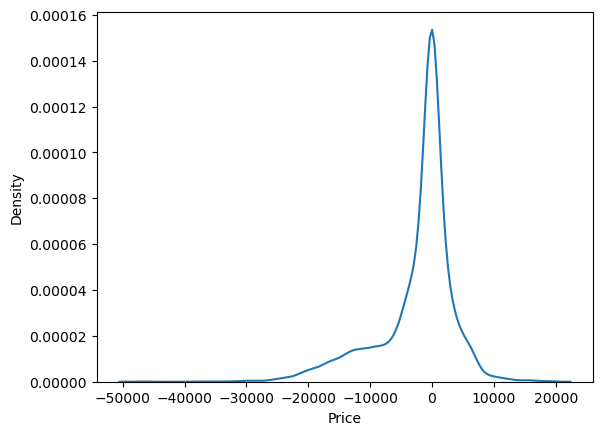

In [64]:
sns.kdeplot(x=predictions-y_test)

In [155]:
r2_score(y_true=y_test,y_pred=res)

0.07353973790798318

As we can see that r2 score is fair if not the best and other algos can also be applied which wil eventually make r2_score significantly better than regression but since we were doing regression project we will limit to this algo this time and will explore other algos later.  
  
YeoJohnson transformation of all features gave slightly better result than StandardScaler.

In [156]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, res))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [158]:
np.sqrt(mean_absolute_error(y_true=y_test,y_pred=predictions))

62.57521684624807

In [157]:
mean_squared_error(y_true=y_test,y_pred=res)

38656367.891448

In [69]:
# lm.coef_

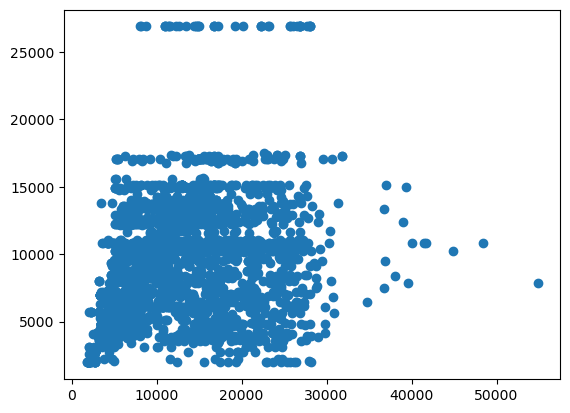

In [70]:
plt.scatter(y_test,predictions)